**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [26]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# %load_ext pycodestyle_magic

In [27]:
# %%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors):
        self._k = n_neighbors
        self._X = None
        self._y = None
        
    
    def fit(self, X, y):
        self._X = np.copy(X)
        self._y = np.copy(y)
        
        
    def predict(self, X):
        y = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            a = np.array(self._y[np.argsort(np.sum((self._X-X[i])**2, axis=1))])[:self._k]
            elem, count_elem = np.unique(a, return_counts=True)
            y[i] = a[np.argmax(count_elem)]
        return y
        
    def predict_proba(self, X):
        y = np.zeros((X.shape[0], np.unique(self._y).shape[0]))
        for i in range(X.shape[0]):
            a = np.array(self._y[np.argsort(np.sum((self._X-X[i])**2, axis=1))])[:self._k]
            elem, count_elem = np.unique(a, return_counts=True)
            y[i][elem] = count_elem/np.sum(count_elem)                    
        return y
    
    def score(self, X, y):
        return np.sum(self.predict(X)==y, dtype=float)/len(y)

**IRIS**

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [7]:
%time clf.fit(X_train, y_train)

CPU times: user 1.39 ms, sys: 208 µs, total: 1.6 ms
Wall time: 3.78 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [11]:
%time my_clf.fit(X_train, y_train)

CPU times: user 45 µs, sys: 7 µs, total: 52 µs
Wall time: 43.2 µs


In [20]:
%time clf.predict(X_test)

CPU times: user 1.71 ms, sys: 0 ns, total: 1.71 ms
Wall time: 3.79 ms


array([0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0, 1])

In [21]:
%time my_clf.predict(X_test)

CPU times: user 1.71 ms, sys: 0 ns, total: 1.71 ms
Wall time: 1.24 ms


array([0., 2., 2., 0., 1., 0., 1., 2., 1., 0., 2., 2., 2., 0., 1.])

In [9]:
%time clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 1.19 ms, total: 1.19 ms
Wall time: 732 µs


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [12]:
%time my_clf.predict_proba(X_test)

CPU times: user 2.73 ms, sys: 0 ns, total: 2.73 ms
Wall time: 3.88 ms


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [13]:
clf.score(X_test, y_test)

1.0

In [14]:
my_clf.score(X_test, y_test)

1.0

In [ ]:
# Задание 3

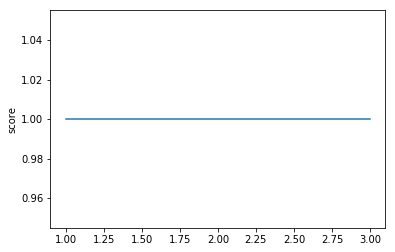

In [15]:
# base class
val_x = [k for k in range(1,4)]
val_y = [KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).score(X_test, y_test) for k in range(1,4)]
plt.plot(val_x, val_y)
plt.ylabel('score')
plt.show()

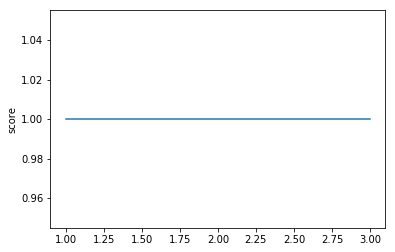

In [16]:
# my class
val_x = []
val_y = []
for k in range(1,4):
    cls = KNeighborsClassifier(n_neighbors=k)
    cls.fit(X_train, y_train)
    val_x.append(k)
    val_y.append(cls.score(X_test, y_test))
plt.plot(val_x, val_y)
plt.ylabel('score')
plt.show()

**MNIST**

In [18]:
mnist = fetch_mldata('MNIST original')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)
X_train = np.array(X_train, dtype=float)
X_test = np.array(X_test, dtype=float)

In [20]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [134]:
%time clf.fit(X_train, y_train)

CPU times: user 43 s, sys: 36 ms, total: 43.1 s
Wall time: 43.1 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [131]:
%time my_clf.fit(X_train, y_train)

CPU times: user 87.5 ms, sys: 95.7 ms, total: 183 ms
Wall time: 182 ms


In [16]:
%time X1 = clf.predict(X_test)

CPU times: user 1.52 ms, sys: 223 µs, total: 1.74 ms
Wall time: 1.32 ms


In [ ]:
%time X2 = my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [135]:
clf.score(X_test, y_test)

0.9641428571428572

In [132]:
my_clf.score(X_test, y_test)

0.9692857142857143

Задание 5

##### seaborn
Выскоуровневая библиотека для визуализации статистических данных основанная на matplotlib

##### matplotlib
Библиотека для построения графиков

##### train_test_split
метод из sklearn, позволяющий разделять датасет на тестовые и обучающие данные

##### Pipelin%load_exte (from sklearn.pipeline import Pipeline)
Magic method загружающий соответствующий модуль
##### StandardScaler (from sklearn.preprocessing import StandardScaler)
Класс для маштабирования данных: вычитает mean и делит на std датасет

##### ClassifierMixin
Базовый класс для всех классификаторов. Содержит метод score, который 
определяет среднюю точность предсказанных данных

##### NeighborsBase
Базовый класс для оценки ближайших соседей

##### KNeighborsMixin
Базовый класс для методов KNN

##### SupervisedIntegerMixin
Класс содержащий метод для обучения на данных с целым типом